<a href="https://colab.research.google.com/github/JAEHYEONG8121/Pytorch-Tutorial/blob/main/LeNet_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LeNet

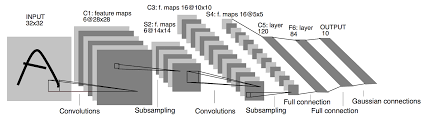

**LeNet architecture**

1x32x32 Input -> (5x5), s=1, p=0 -> avg pool s=2, p=0 -> (5x5), s=1, p=0 -> avg pool s=2, p=0 -> Conv 5x5 to 120 channels x LInear 120 -> Linear 84 -> Linear 10

In [1]:
import torch
import torch.nn as nn

In [5]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.relu = nn.ReLU()
    self.pool = nn.AvgPool2d(kernel_size=(2, 2), stride=(2, 2))
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5, 5), stride=(1, 1), padding=(0, 0))
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), stride=(1, 1), padding=(0, 0))
    self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5, 5), stride=(1, 1), padding=(0, 0))
    self.linear1 = nn.Linear(120, 84)
    self.linear2 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.relu(self.conv1(x))
    x = self.pool(x)
    x = self.relu(self.conv2(x))
    x = self.pool(x)
    x = self.relu(self.conv3(x)) # num_examples x 120 x 1 x 1 --> num_examples x 120
    x = x.reshape(x.shape[0], -1)
    x = self.relu(self.linear1(x))
    x = self.linear2(x)

    return x

In [6]:
x = torch.randn(64, 1, 32, 32)
model = LeNet()
print(model(x).shape)

torch.Size([64, 10])
